In [4]:
#import all the nessecary libraries 
import cv2
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.vq import kmeans
from scipy.cluster.vq import whiten
import pandas as pd

In [5]:
#reading the image
image=cv2.imread(r"image for segementation.jpg")

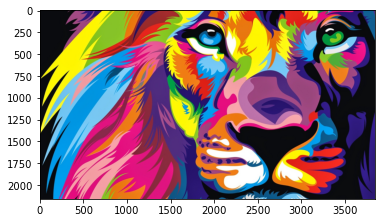

In [6]:
#changing the color of the image from BGR TO RGB
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:
image

array([[[ 10,  11,  15],
        [ 10,  11,  15],
        [ 10,  11,  15],
        ...,
        [ 80,  43, 136],
        [ 83,  42, 134],
        [ 83,  42, 134]],

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [ 10,  11,  15],
        ...,
        [ 80,  43, 136],
        [ 83,  42, 134],
        [ 83,  42, 134]],

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [ 10,  11,  15],
        ...,
        [ 80,  43, 136],
        [ 83,  42, 134],
        [ 83,  42, 134]],

       ...,

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [ 10,  11,  15],
        ...,
        [ 43,  24, 114],
        [ 43,  24, 114],
        [ 43,  24, 114]],

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [ 10,  11,  15],
        ...,
        [ 43,  24, 114],
        [ 43,  24, 114],
        [ 43,  24, 114]],

       [[ 10,  11,  15],
        [ 10,  11,  15],
        [ 10,  11,  15],
        ...,
        [ 43,  24, 114],
        [ 43,  24, 114],
        [ 43,  24, 114]]

In [8]:
#reshaping the data (image )into 2D 
pil_val=image.reshape((-1,3))
pil_val

array([[ 10,  11,  15],
       [ 10,  11,  15],
       [ 10,  11,  15],
       ...,
       [ 43,  24, 114],
       [ 43,  24, 114],
       [ 43,  24, 114]], dtype=uint8)

In [9]:
#converting it into float type
pil_val=np.float32(pil_val)
pil_val

array([[ 10.,  11.,  15.],
       [ 10.,  11.,  15.],
       [ 10.,  11.,  15.],
       ...,
       [ 43.,  24., 114.],
       [ 43.,  24., 114.],
       [ 43.,  24., 114.]], dtype=float32)

In [10]:
#defines the criteria for the algorithm to stop running,which will happen is 100 iterations are run 
criteria=(cv2.TERM_CRITERIA_EPS +  cv2.TERM_CRITERIA_MAX_ITER,100,0.85)

In [11]:
k=

In [12]:
# retreval,centres,labels=cv2.kmeans(pil_val, k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
retval, labels, centers = cv2.kmeans(pil_val, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [13]:
#covert the data into eight bits
centers=np.uint(centers)

segmented_data=centers[labels.flatten()]

In [14]:
#shaping  the data into the orginal dimention of the image to enable printing it

segmented_image=segmented_data.reshape(image.shape)

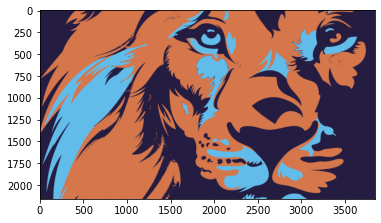

In [15]:
plt.imshow(segmented_image)

In [16]:
#Before we apply K-means to find the dominant colors, we need data pre-process
#construct to a dataframe for future data process
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,10,11,15
1,10,11,15
2,10,11,15
3,10,11,15
4,10,11,15


In [17]:
#data elements need to be standardized or whiten
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

,r,g,b,r_whiten,g_whiten,b_whiten
0,10,11,15,0.104449,0.134551,0.191001
1,10,11,15,0.104449,0.134551,0.191001
2,10,11,15,0.104449,0.134551,0.191001
3,10,11,15,0.104449,0.134551,0.191001
4,10,11,15,0.104449,0.134551,0.191001


In [20]:
#using kmeans from scipy for the data cluster

cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 7)

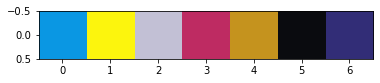

[(10, 151, 227),
 (252, 245, 13),
 (194, 192, 213),
 (190, 43, 98),
 (197, 147, 30),
 (10, 11, 15),
 (50, 45, 119)]

In [21]:
#Restore R, G, B
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()
colors